# __Welcome to the notebook!__
This notebook takes you through the various steps we went through for this data mining project. Here, you will have a detailed look at the logic as well as the actyual code behind each data mining concept we applied so as to achieve our conclusion.
#### __Notebook Outline__:
<ol type="I">
<b>
<li>Theme Description</li>
<li>Dataset Overview</li>
<li>Data Exploration and Preprocessing</li>
<li>Data Mining Techniques</li>
<li>Model Building</li>
<li>Analysis and Evaluation</li>
<li>Conclusion</li>
</b>
</ol>

//(edit as necessary)

## __I. Theme Description__
Our theme of choice is `huh`

#### 
<u>__Objective__:</u>
Build a `classification model to do xyz`

## __II. Dataset Overview__
This dataset represents a health profile of individuals, capturing a variety of demographic information, geographical data, medical history, and current health status. It is designed to facilitate the understanding of patients' health needs and identify potential necessary urgent interventions.

This dataset could be used for a wide range of purposes, including epidemiological studies, healthcare service planning, and personalized patient care management. Each row represent a unique patient, with their respective health and demographic data.
<br><br>
<u>__Source:__</u>
The data was collected during the academic year 2021/2022, during the peak of the covid-19 epidemic so as to make __home hospitalization__ a valid possibility in order to reduce the massive load on hospitals during the pandemic. It was collected by former students from the __University of Constantine 2 Abdelhamid Mehri__, in collaboration with the medical staff of __University Hospital (CHU) Abdelhamid Ben Badis__ in Constantine.

## __III. Data Exploration and Preprocessing__

First of all, let's start with importing the necessary python libraries as well as the dataset itself:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# import the dataset
df = pd.read_csv('./dataset/dataset.csv')

In [2]:
# print shape and header
print(f"The dataset consists of {df.shape[0]} rows, {df.shape[1]} columns.")
df.head()
df['PT']

The dataset consists of 800 rows, 27 columns.


0      15
1      12
2      24
3      16
4      14
       ..
795    14
796    10
797    13
798    12
799    15
Name: PT, Length: 800, dtype: int64

We can see that the dataset has **27 columns**. This is a clear indicator that we may need to apply some dimentionality reduction in the future.
Those columns are:

In [3]:
df.columns

Index(['ID', 'Age', 'Gender', 'Service Time', 'Latitude', 'Longitude',
       'Diabetes', 'Hypertension', 'Heart disease', 'Cancer',
       'Chronic obstructive pulmonary disease', 'Kidney disease',
       'Glucose level', 'CRP', 'PT', 'Cholesterol level', 'Triglyceride level',
       'Blood pressure', 'Heart rate', 'Body temperature', 'Oxygen saturation',
       'Pain level', 'Medication adherence', 'WBC', 'RBC', 'Platelet Count',
       'Service request'],
      dtype='object')

In [4]:
df.describe()

,ID,Age,Service Time,Latitude,Longitude,Glucose level,CRP,PT,Cholesterol level,Triglyceride level,Blood pressure,Heart rate,Body temperature,Oxygen saturation,Pain level,WBC,RBC,Platelet Count
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,8.000000e+02,800.000000
mean,400.5000,50.716250,19.050000,36.345699,6.622854,99.395000,4.889125,14.147500,184.760000,145.060000,115.472500,74.963750,36.897625,96.300000,1.233750,8190.626250,4.903701e+06,292668.273750
std,231.0844,14.388694,5.274445,0.026172,0.027868,13.199404,5.425794,3.851205,19.964171,32.505879,17.946499,13.175334,1.048872,2.703541,1.396979,3137.804501,7.910640e+05,81677.102523
min,1.0000,19.000000,10.000000,36.283333,6.548178,75.000000,0.500000,9.000000,150.000000,100.000000,80.000000,51.000000,35.100000,87.000000,0.000000,4011.000000,4.003029e+06,150372.000000
25%,200.7500,40.000000,15.000000,36.328513,6.602250,90.000000,1.900000,12.000000,170.000000,121.000000,102.000000,67.000000,36.200000,95.000000,0.000000,6118.000000,4.368860e+06,223640.000000
50%,400.5000,50.000000,20.000000,36.351013,6.624519,97.000000,3.100000,13.000000,183.000000,136.000000,114.000000,73.000000,36.700000,97.000000,1.000000,7589.000000,4.693474e+06,289881.500000
75%,600.2500,60.000000,25.000000,36.363681,6.644548,106.000000,4.925000,16.000000,196.000000,158.250000,128.000000,79.000000,37.400000,98.000000,2.000000,9123.000000,5.106414e+06,352624.000000
max,800.0000,99.000000,30.000000,36.414054,6.728596,147.000000,34.300000,29.000000,250.000000,246.000000,171.000000,129.000000,40.500000,100.000000,8.000000,19873.000000,8.333619e+06,505213.000000


### Columns description:
#### Feature Columns:
* `Age`: patient's age
* `Gender` patient's gender `['M', 'F']`
* `Service Time`
* `Latitude`:
* `Longitude`:
* `Diabetes`: does the patitent have diebetes? `['Yes', 'No']`
* `Hypertension`: patient's hypertension condition `['Medium', 'Moderate', 'High', 'No']`
* `Heart disease`: does the patitent have heart problems? ['Yes', 'No']
* `Cancer`: does the patient have cancer? ['Yes', 'No']
* `Chronic obstructive pulmonary disease`: ['Yes', 'No']
* `Kidney disease`: ['Yes', 'No']
* `Glucose level`: patient's sugar level at the time of measurment in __mg/l__: `int, [75, 147]`
* `CRP`[1]: C-reactive protein. Measured in __mg/DL__: `float, [0.5, 34.3]`
* `PT`[2]: Prothrombin Time. Measured in __seconds__: `int, [9, 29]`
* `Cholesterol level`: patient's cholesterole level. Measured in __mmol/L__: (millimoles/Liter) `int, [150, 250]`
* `Triglyceride level`: Measured in __mg/dL__: `int, [100, 246]`
* `Blood pressure`: measured in __mmHg__ (millimeters of mercury): `int, [80, 171]`
* `Heart rate`: measured in __bpm__ (beats per minute): `int, [51, 129]`
* `Body temperature`: measured in C&deg;: `float, [35.1, 40.5]`
* `Oxygen saturation`[3]: described as a percentage: `int, [87, 100]`
* `Pain level`: arbitrary unit. `int, [0, 10]`
* `Medication adherence`: how well the patient followed perscriptions. `['High', 'Low']`
* `WBC`: white Blood Cell Count: Measured in 10^3/μL (thousands per microliter): `float, [4011, 19873]`
* `RBC`: red Blood Cell Count: Measured in 10^6/μL (millions per microliter): `float, [4003029, 8333619]`
* `Platelet Count`: measured in 10^3/μL (thousands per microliter): `int, [150372, 505213]`
#### Target Column:
* `Service request`: a categorical variable describing the patient's requested medical service based on the doctor's opinion. Available services are: `['Nursing care',
 'cardiology',
 'general medicine',
 'internal medicine',
 'pneumology']`

In [5]:
missing_values = df.isnull().sum()

missing_values, df.dtypes

df = df.rename(columns={'Chronic obstructive pulmonary disease': 'COPD'})

print("Categorical columns' unique values before standardization: /n")
categorical_columns = ['Gender', 'Diabetes', 'Hypertension', 'Heart disease',
                       'Cancer', 'COPD', 'Kidney disease', 'Medication adherence', 'Service request']
for column in categorical_columns:
    print(column, df[column].unique())

Categorical columns' unique values before standardization: /n
Gender ['F' 'M']
Diabetes ['No' 'Yes']
Hypertension ['Medium' 'No' 'Moderate' 'High']
Heart disease ['No' 'Yes']
Cancer ['No' 'Yes']
COPD ['No' 'Yes']
Kidney disease ['No' 'Yes']
Medication adherence ['High' 'Low']
Service request ['Nursing care' 'general medicine' 'internal medicine' 'pneumology'
 'cardiology']


### Categorical Data Standardization:

In [6]:
# ****** Standardizing text data ******

# binary data (yes, no) -> (0, 1)
binary_columns = ['Diabetes', 'Heart disease',
                  'Cancer', 'COPD', 'Kidney disease']
for column in binary_columns:
    df[column] = df[column].replace({'No': 0, 'Yes': 1})

df['Medication adherence'] = df['Medication adherence'].replace(
    {'High': 1, 'Low': 0})

# Standardize text data in 'Service request' column
df['Service request'] = df['Service request'].str.title().str.strip()

print("Categorical columns' unique values after standardization: /n")
categorical_columns = ['Gender', 'Diabetes', 'Hypertension', 'Heart disease',
                       'Cancer', 'COPD', 'Kidney disease', 'Medication adherence', 'Service request']
for column in categorical_columns:
    print(column, df[column].unique())

Categorical columns' unique values after standardization: /n
Gender ['F' 'M']
Diabetes [0 1]
Hypertension ['Medium' 'No' 'Moderate' 'High']
Heart disease [0 1]
Cancer [0 1]
COPD [0 1]
Kidney disease [0 1]
Medication adherence [1 0]
Service request ['Nursing Care' 'General Medicine' 'Internal Medicine' 'Pneumology'
 'Cardiology']


### Data Visualization:

The visualization focuses mostly on the columns stored in variable `key_visualization_columns` below. The decision to focus on those particular features comes from recommendations from proffessional physicians whith whom we've had contact.

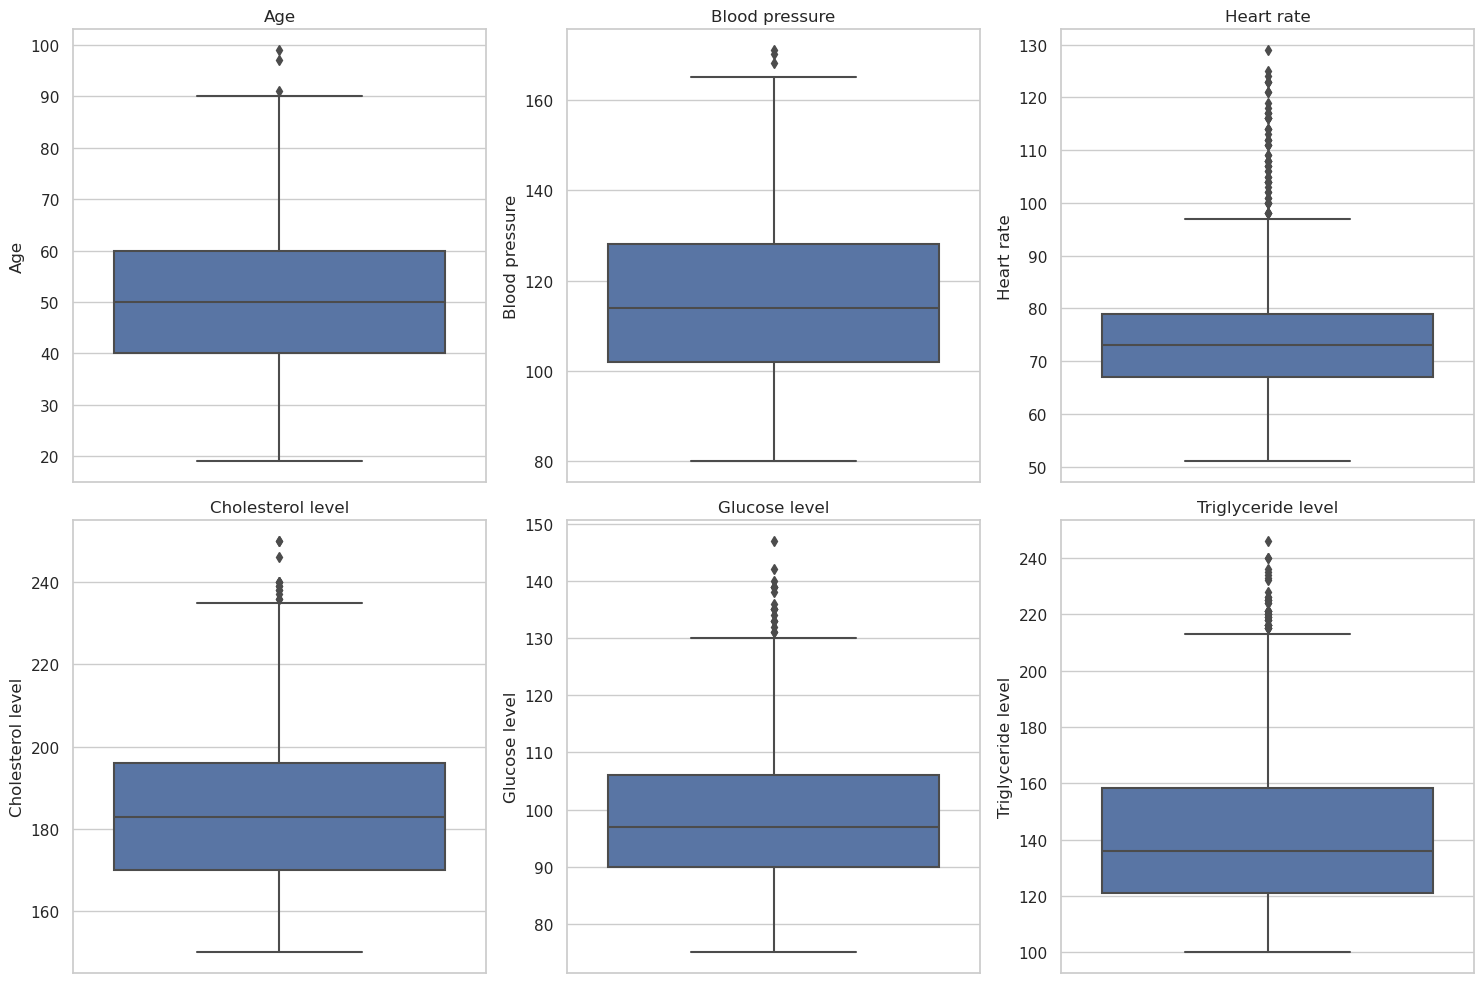

In [7]:
# Set the style of seaborn for better visuals
sns.set(style="whitegrid")

# Selecting columns for box plots
key_visualization_columns = ['Age', 'Blood pressure', 'Heart rate', 'Cholesterol level', 'Glucose level', 'Triglyceride level']

# Creating box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(key_visualization_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

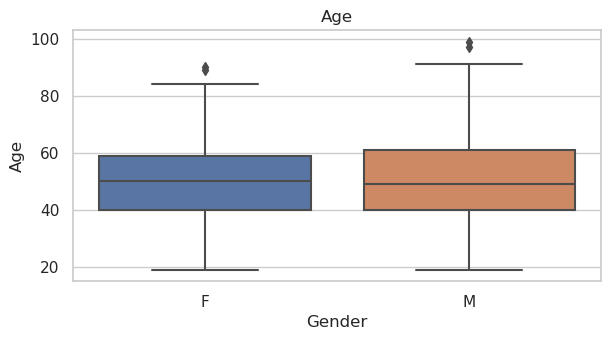

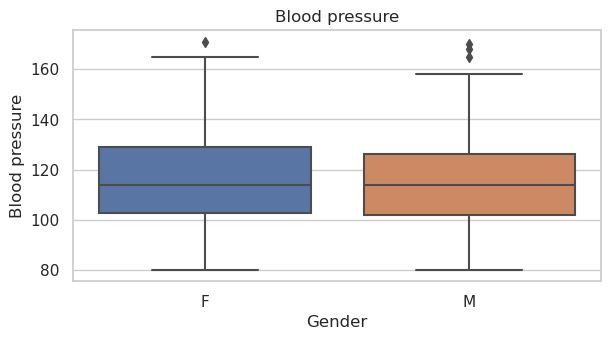

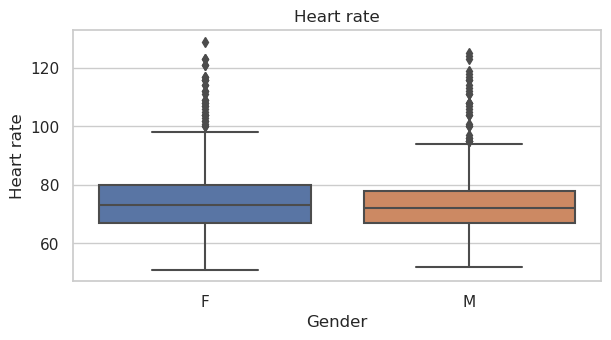

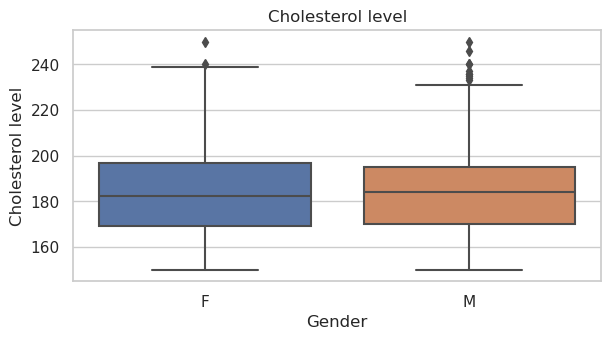

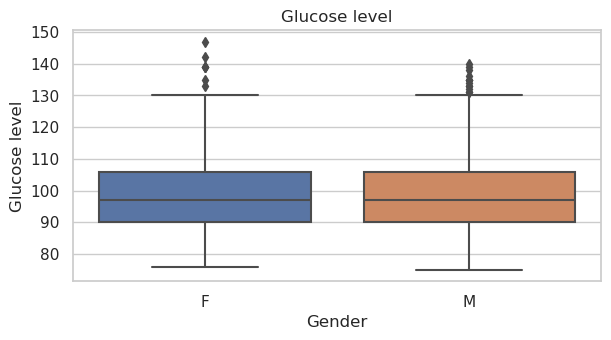

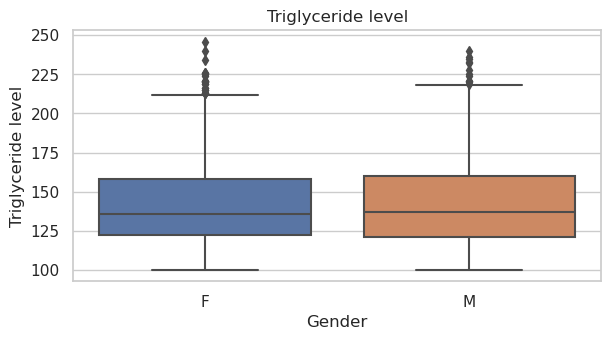

In [8]:
# side-by-side boxplot for the numerical attributes respect to the gender
for i, col in enumerate(key_visualization_columns, 1):
    sns.set(style="whitegrid")
    plt.figure(figsize=(15, 15))
    plt.subplot(4, 2, i)
    sns.boxplot(x= 'Gender', y=col, data= df)
    plt.title(col)


### Outlier Detection and Handling:
In order to do that, we will use the __IQR__ (Inter-Quartile Range) method:

In [9]:
# Identifying outliers using the IQR method
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
outliers = {}

for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

# Summarize the number of outliers in each column
outlier_counts = {col: len(outliers_data) for col, outliers_data in outliers.items() if not outliers_data.empty}
outlier_counts


{'Age': 3,
 'Longitude': 1,
 'Diabetes': 120,
 'Heart disease': 36,
 'Cancer': 34,
 'COPD': 50,
 'Kidney disease': 70,
 'Glucose level': 20,
 'CRP': 101,
 'PT': 43,
 'Cholesterol level': 13,
 'Triglyceride level': 40,
 'Blood pressure': 3,
 'Heart rate': 60,
 'Body temperature': 32,
 'Oxygen saturation': 37,
 'Pain level': 20,
 'Medication adherence': 131,
 'WBC': 58,
 'RBC': 72}

### Outlier Visualization:

This __violin plot__ approach, alongside the particular column in the variable `key_medical_columns`, were professional recommendations.

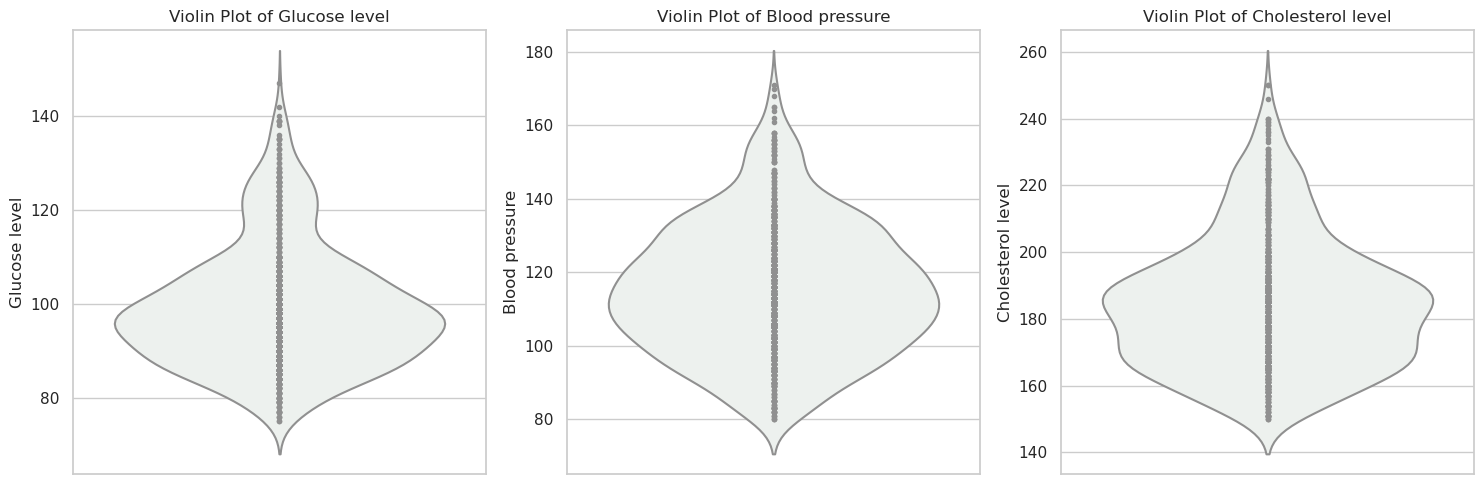

In [10]:
# Visualizing outliers with violin plots for a more detailed view
key_medical_columns = ['Glucose level', 'Blood pressure', 'Cholesterol level']

plt.figure(figsize=(15, 5))
for i, col in enumerate(key_medical_columns, 1):
    plt.subplot(1, 3, i)
    sns.violinplot(y=df[col], inner="point", palette="light:g")
    plt.title(f"Violin Plot of {col}")

plt.tight_layout()
plt.show()

TODO: <br>
* __Analysis:__ We can see that ....

#### Correlation Visualization between Heart Diseases and Heart Rate:

In [ ]:
sns.boxplot(x= 'Heart disease', y='Heart rate', data= df)

TODO: <br>
* __Analysis:__ The box plot shows that _patients with heart diseases tend to have a higher heart rate._ <br>This implies that the two variables are __highly correlated__.

### Visualizing Binary Data Against Request Service:

Using grouped bar charts for binary features such as `'Diabetes'` and `'Heart disease'`, we can see how the presence/absence of said features impacts the `'service request'`, our target variable.
We'll start by encoding the values of `Service request` column using `sklearn.preprocessing.LabelEncoder`:

In [11]:
from sklearn.preprocessing import LabelEncoder

# Encode your categorical data for visualization
label_encoder = LabelEncoder()
df['Service Request'] = label_encoder.fit_transform(df['Service request'])

label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
label_mapping

{'Cardiology': 0,
 'General Medicine': 1,
 'Internal Medicine': 2,
 'Nursing Care': 3,
 'Pneumology': 4}

Then we can visualize, `pandas.crosstab` (cross tabulation, a.k.a. contingency) method, which measures the frequency count of each unique value in the column `disease` against each unique value in the `Service Request` column.:

In [ ]:
for disease in binary_columns:
    crosstab = pd.crosstab(df[disease], df['Service Request'], normalize='index')
    crosstab.plot(kind='bar', stacked=False, figsize=(20, 6))
    plt.title(f'Bar Chart of {disease} vs Service Request')
    plt.ylabel('Percentage')
    plt.xlabel(disease)
    plt.show()

* __Analysis:__ We can see intersting patterns arise. In the first chart, we can see that 100% of patients with `Diabetes`, as well as 100% of patients with `Kidney Disease` all requested service 2, which corresponds to `Internal Medicine`. <br><br>
Those results show that it might be very suitable to try __association rules__ extraction.

## __IV. Data Mining Techniques__

### __a. Dimesionality Reduction__:
Due to the nature of this dataset, especially the fact it has 25 feature columns, and since we would still like to see interesting relationships between the actual features and the target variable, we opted to go with a __feature selection__ approach, rather than feature extraction.

#### Data Correlation Heatmap:
Once again, we will focus on the columns from `key_visualization_columns` variable defined above.

<Axes: >

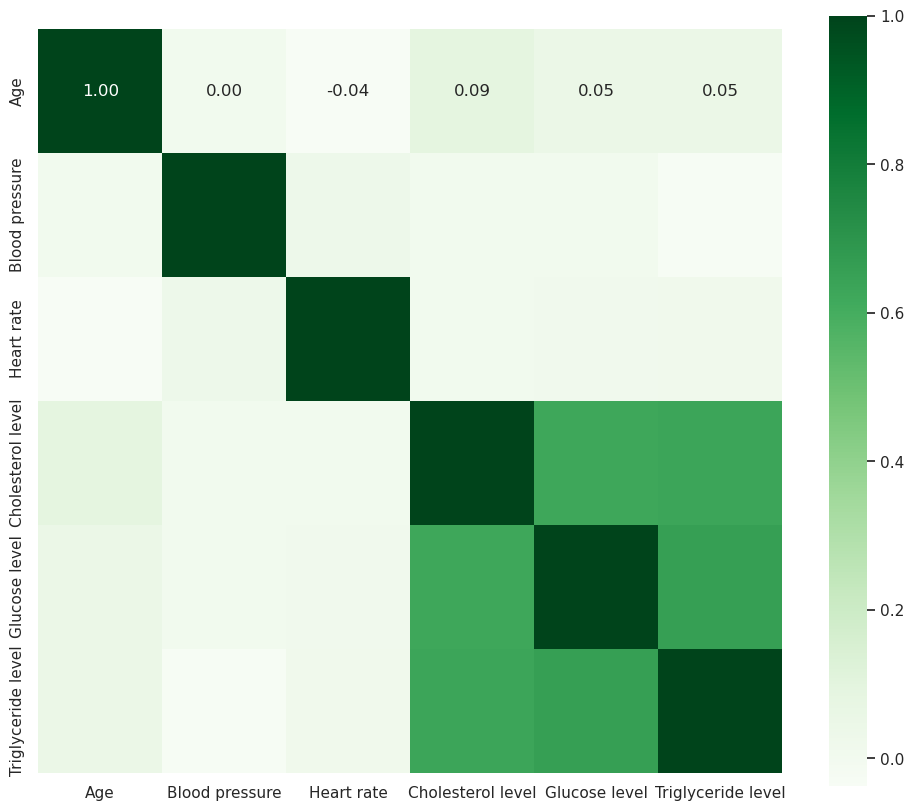

In [11]:
plt.figure(figsize=(12, 10))

sns.heatmap(df[key_visualization_columns].corr(), annot=True,
            fmt=".2f", cmap='Greens', square=True)

TODO: <br>
* __Analysis:__ Here we can notice that there is very little correlation between those key feature columns, making dimentionality reduction potentially costly in terms of lost variance.

#### Title or smthn
TODO: Shouldn this be moved to data exploration?

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Label encode the 'Service Request' since it's a categorical variable
label_encoder = LabelEncoder()
df['Service request'] = label_encoder.fit_transform(df['Service request'])

# One-hot encode categorical features
df_encoded = pd.get_dummies(df.drop(['Service request'], axis=1))

# Scale the data to make it suitable for chi-squared test
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Split the data into features and target variable
X = df_scaled
y = df['Service request']

In [14]:
from sklearn.feature_selection import SelectKBest, chi2, RFE

# Apply SelectKBest class to extract top 'k' best features
bestfeatures = SelectKBest(score_func=chi2, k='all') # You can change k to the number of top features you want
fit = bestfeatures.fit(X, y)

# Get scores for each feature
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df_encoded.columns)

# Concatenate two dataframes for better visualization and print them
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(10, 'Score')) # change k to the number of top features you want to see


                Feature       Score
6         Heart disease  655.812865
8                  COPD  554.253990
5              Diabetes  385.263158
9        Kidney disease  224.736842
24      Service Request   93.781360
12                   PT   54.909835
7                Cancer   50.672109
19           Pain level   34.432384
14   Triglyceride level   29.412160
28  Hypertension_Medium   27.712484


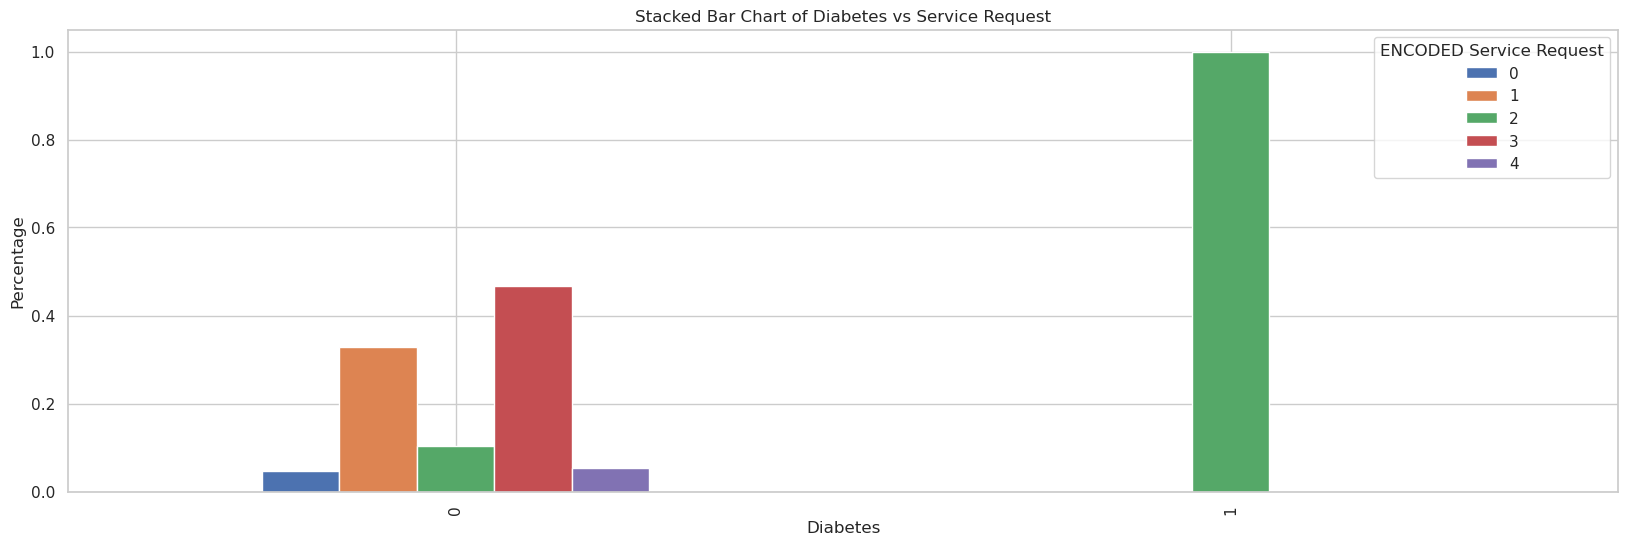

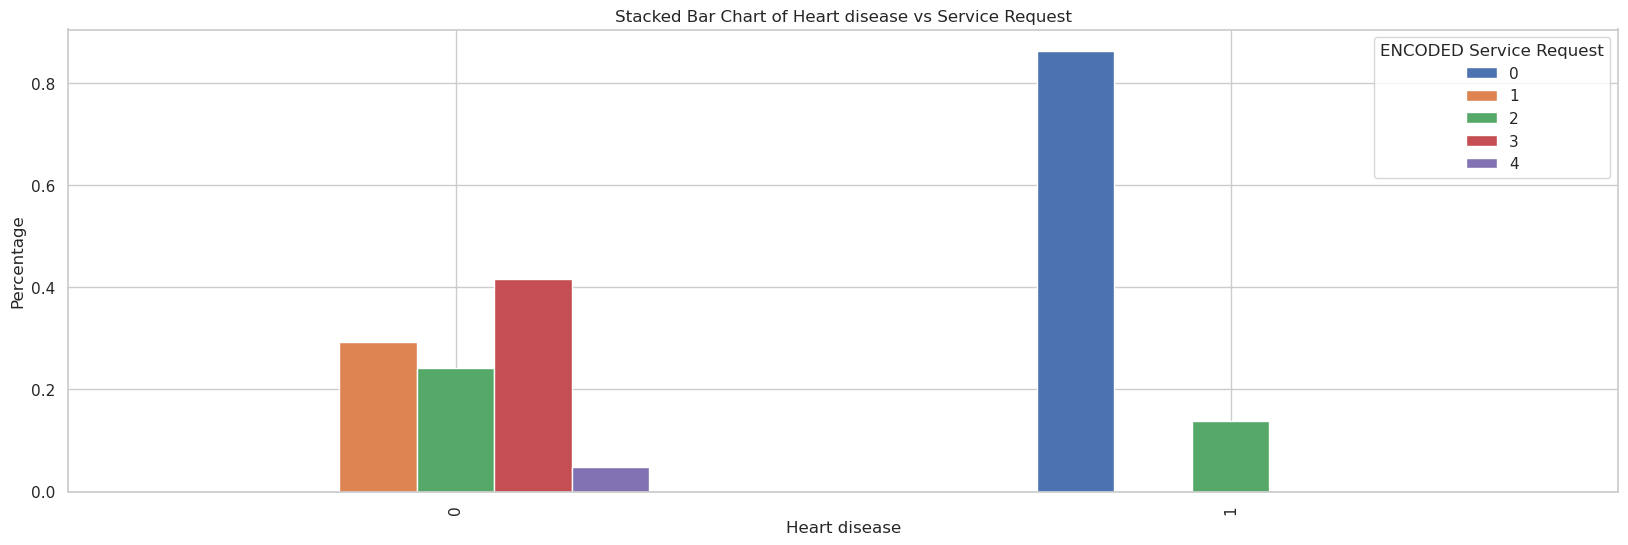

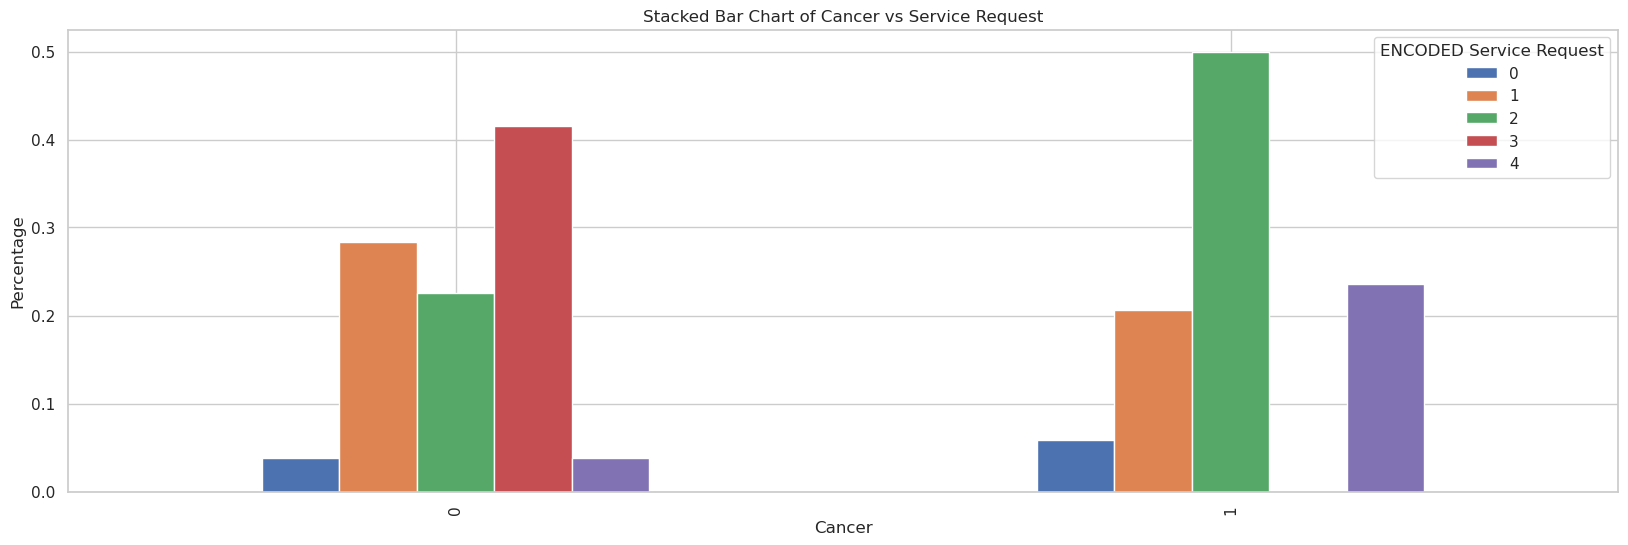

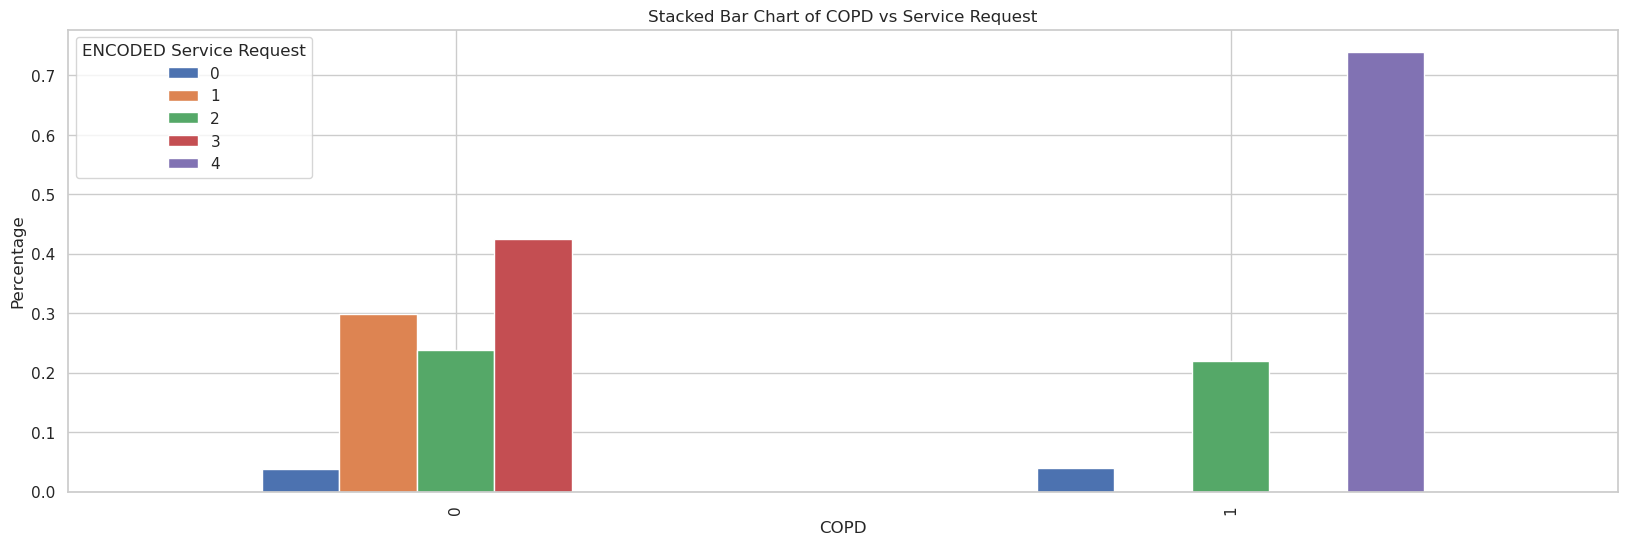

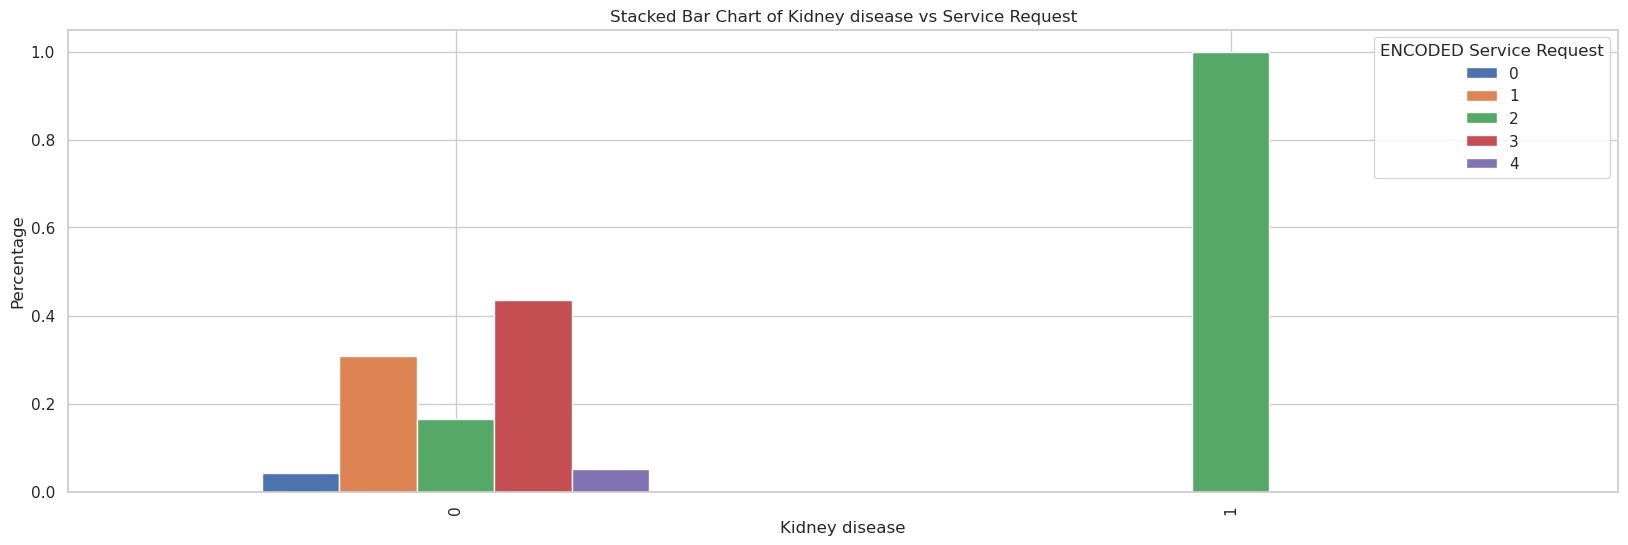

#### Heatmaps for TODO:

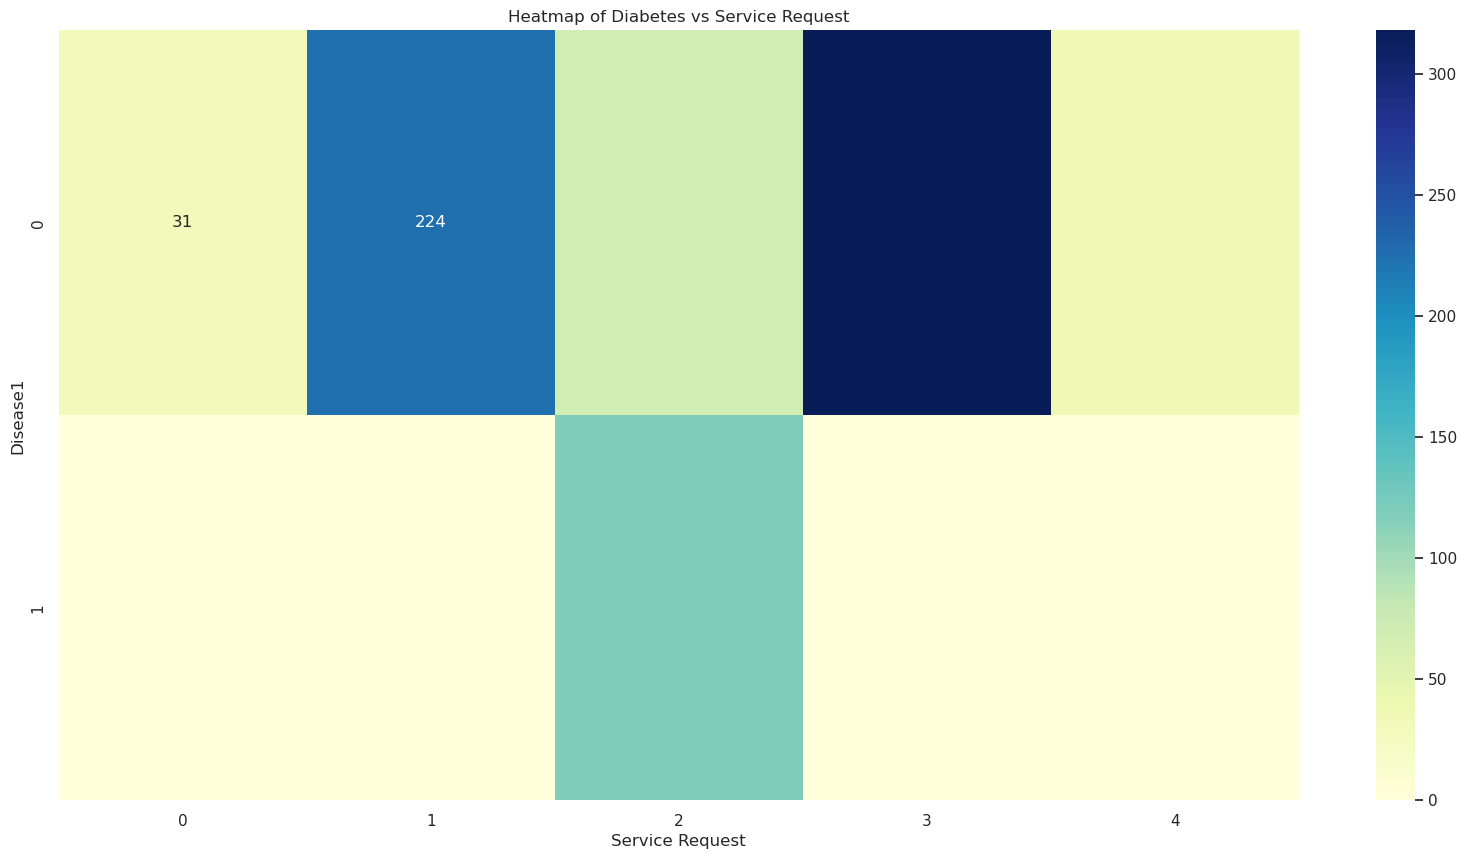

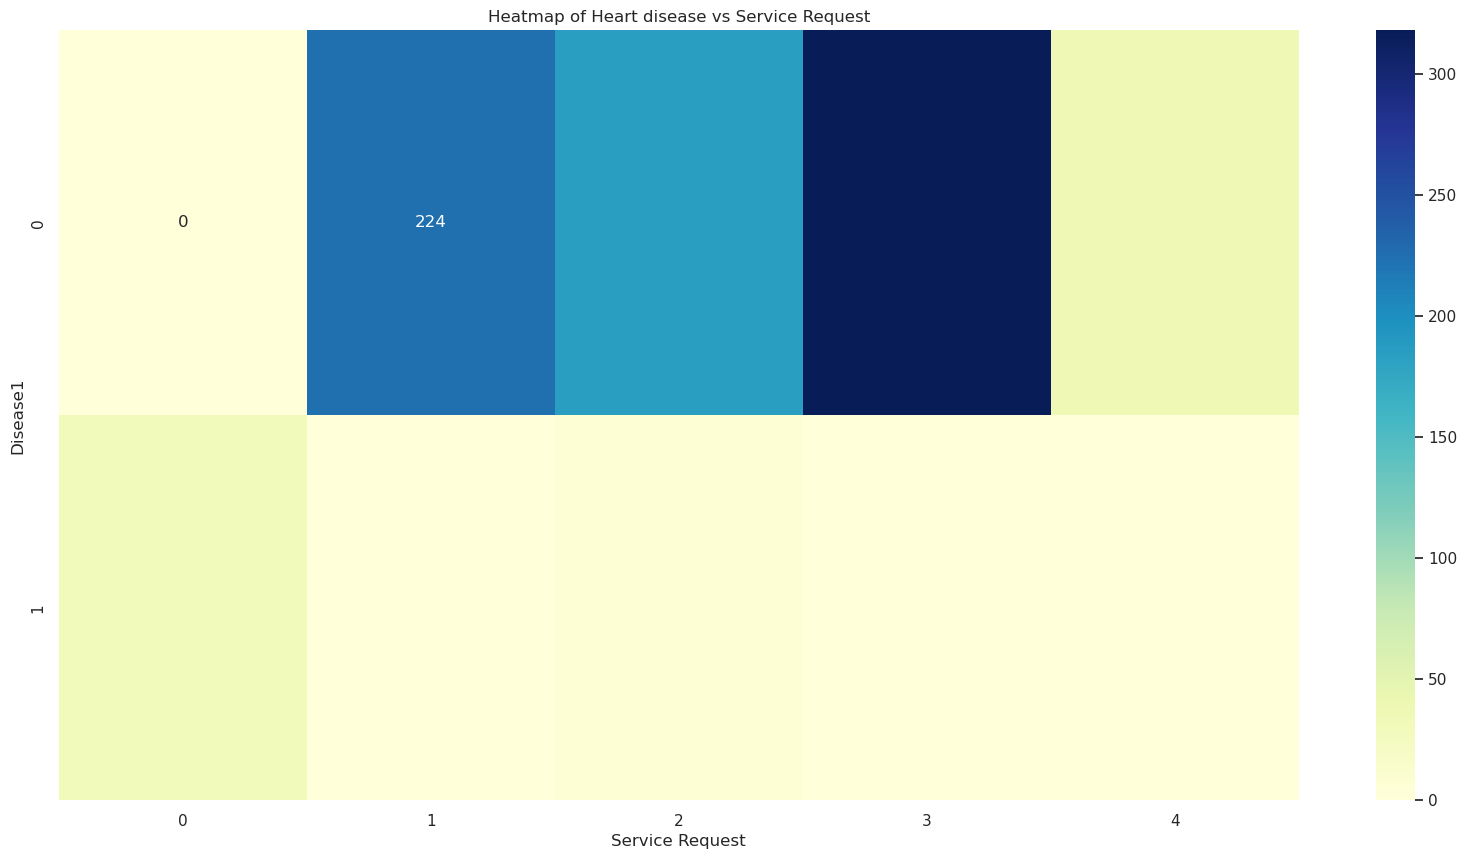

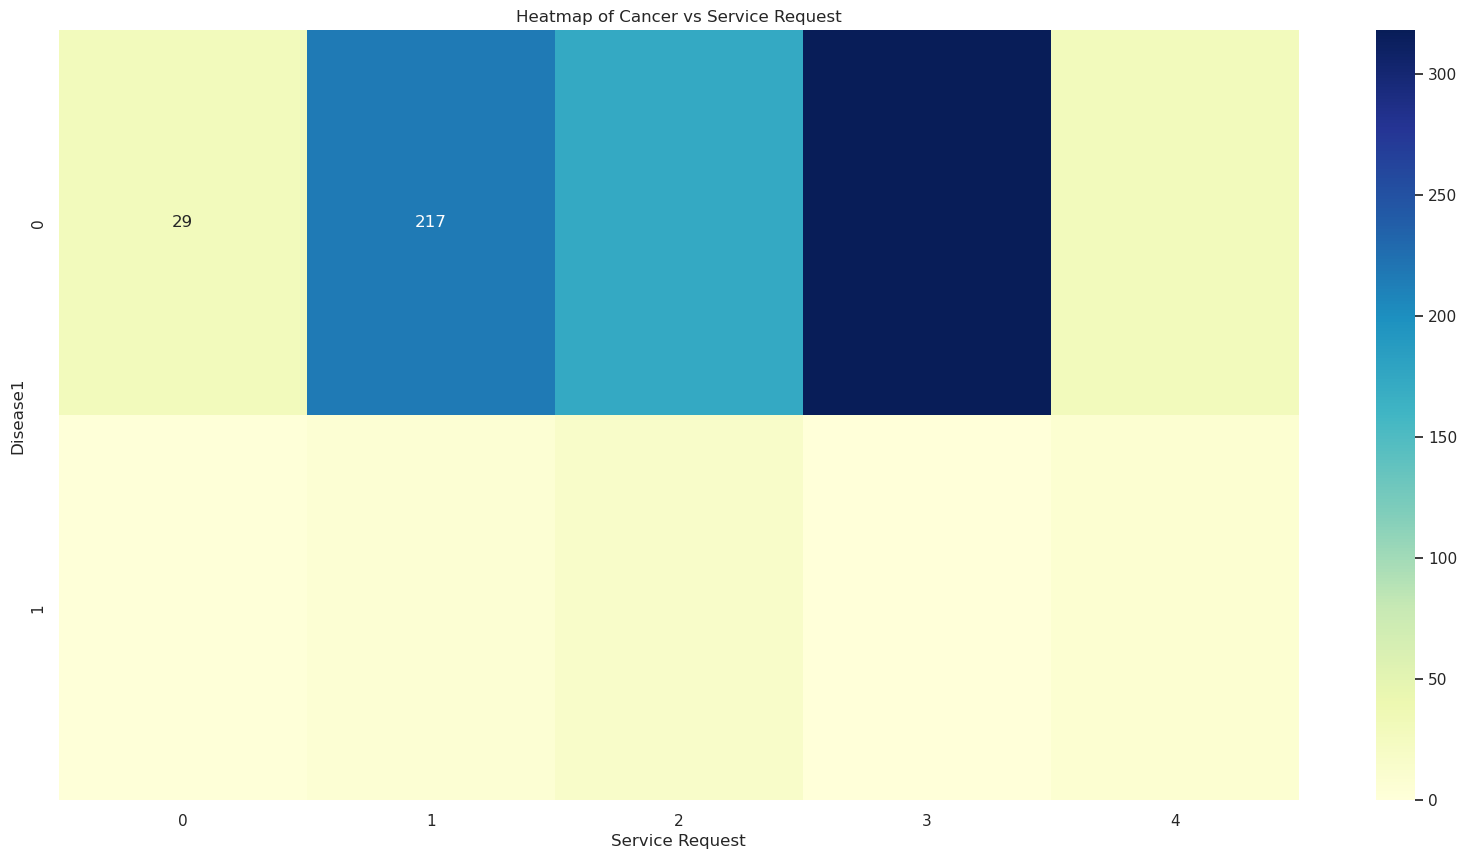

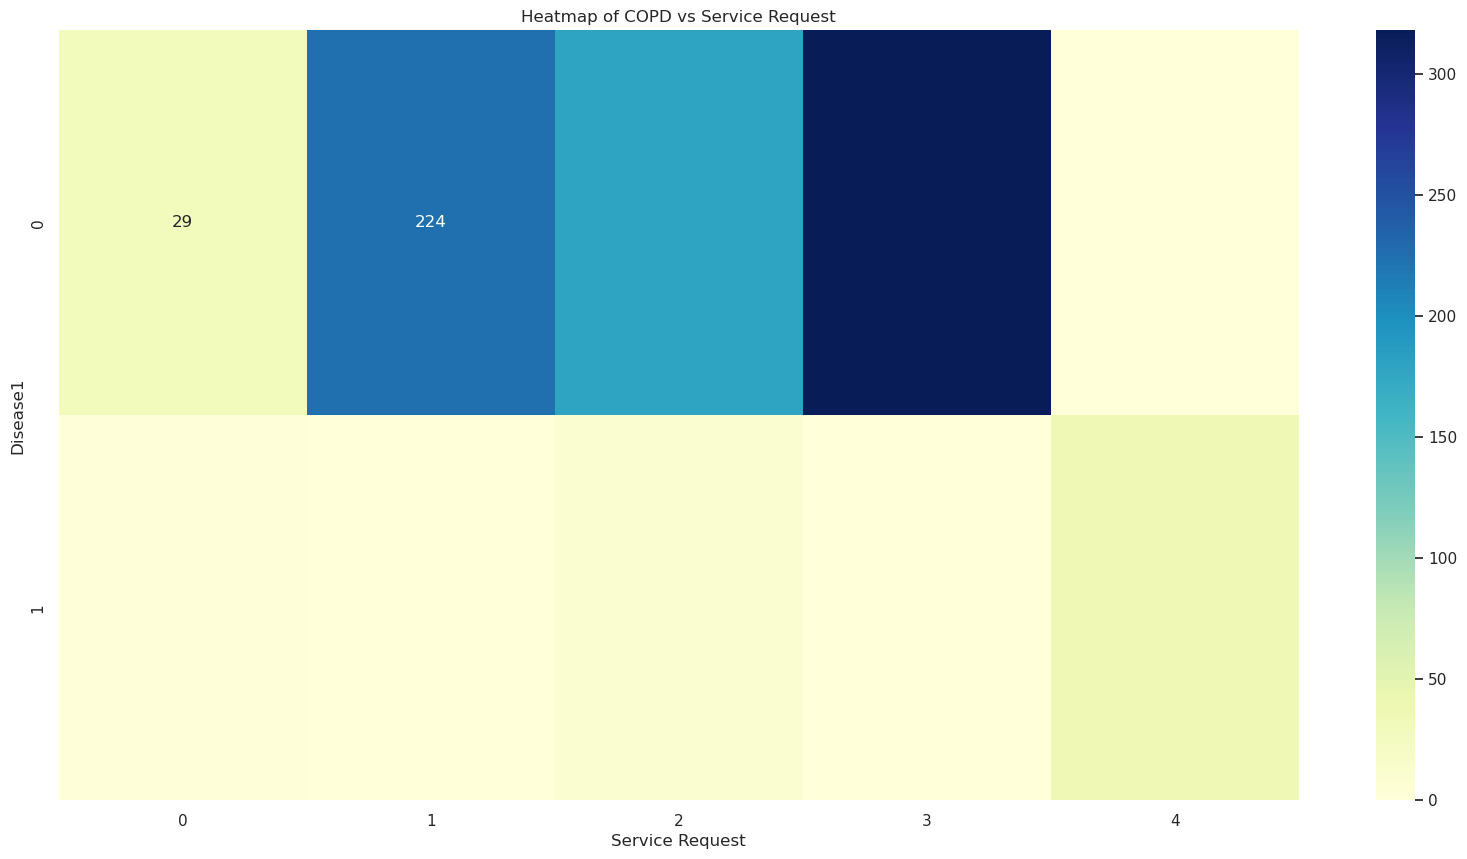

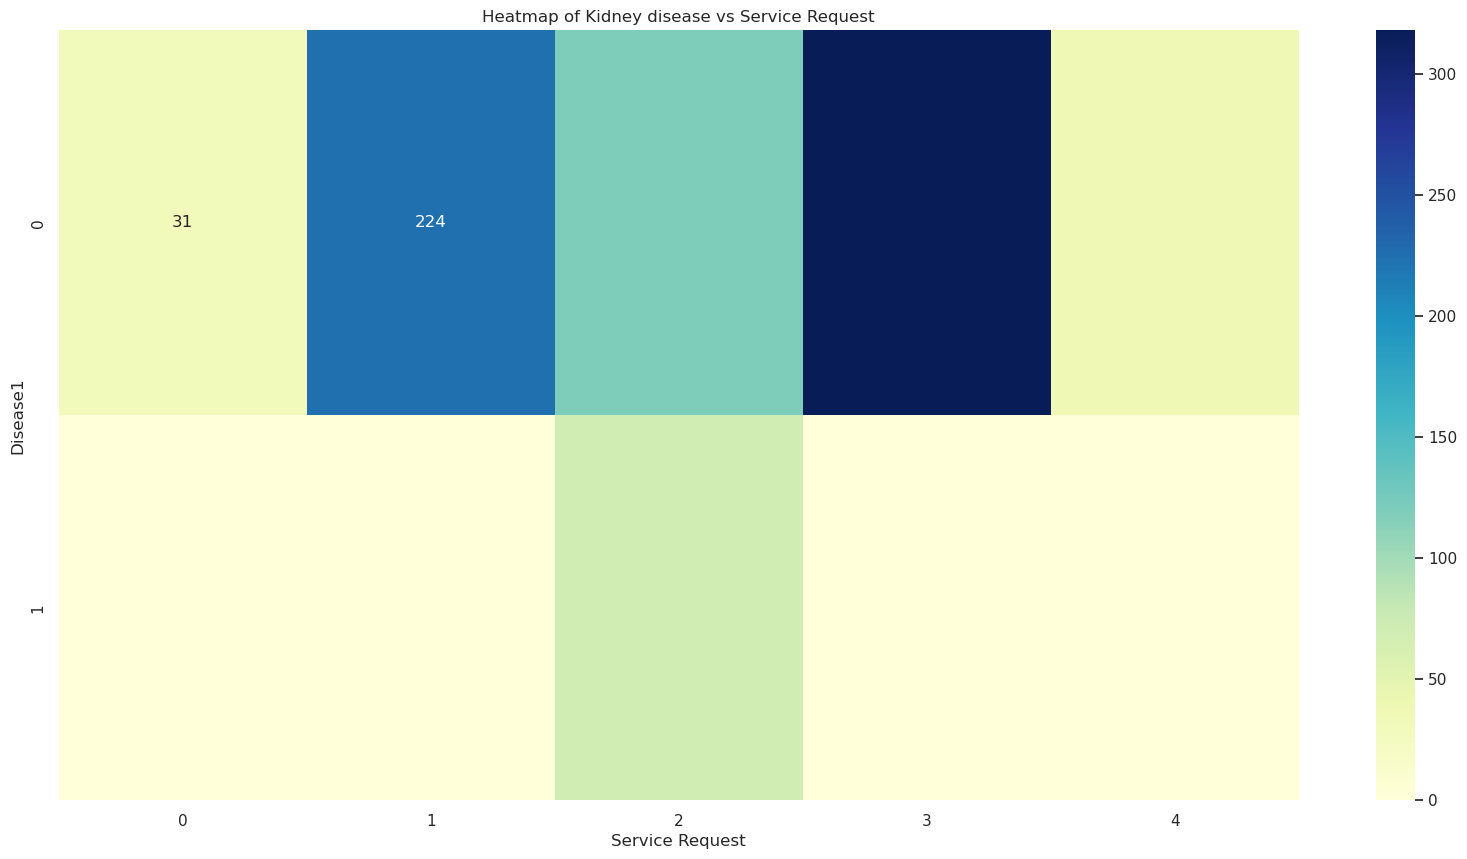

In [15]:
for col in binary_columns:
    ct = pd.crosstab(df[col], df['Service Request'])
    plt.figure(figsize=(20, 10))
    sns.heatmap(ct, annot=True, fmt='d', cmap="YlGnBu")
    plt.title(f'Heatmap of {col} vs Service Request')
    plt.ylabel('Disease1')
    plt.xlabel('Service Request')
    plt.show()

### __b. Association Rules__
As we have seen above in the __Data Exploration and Preprocessing__ section, association rules extraction would be quite suitable for this dataset. TODO:

## __V. Model Building__

## __VI. Analysis and Evaluation__

## __VII. Conclusion__